## Classifying movie reviews: 
## A binary classification example

### The IMDB dataset:

##### Loading the IMDB dataset 

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

2023-12-22 16:04:43.949089: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
## The variables train_data and test_data are lists of reviews; each review is a list of word indices (encoding a sequence of words)
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
## train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

##### Decoding reviews back to text

In [5]:
word_index = imdb.get_word_index() # word_index is a dictionary mapping words to an integer index.
# Reverses it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
# Decodes the review. Note that the indices are offset by 3 because 
# 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

##### Preparing the data:

###### Encoding the integer sequences via multi-hot encoding:

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # Creates an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences): 
        for j in sequence:
            results[i, j] = 1. #Sets specific indices of results[i] to 1s
    return results
    

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

##### Building your model:

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
model = keras.Sequential([
    layers.Dense(16,activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [17]:
model.compile(
    optimizer="rmsprop",
    loss = "binary_crossentropy",
    metrics=["accuracy"]
)

##### Validating your approach:

In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size= 512,
    validation_data=(x_val,y_val)

)

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.5129 - accuracy: 0.7819 - val_loss: 0.3934 - val_accuracy: 0.8602
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3180 - accuracy: 0.8944 - val_loss: 0.3103 - val_accuracy: 0.8843
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2428 - accuracy: 0.9183 - val_loss: 0.2867 - val_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1973 - accuracy: 0.9336 - val_loss: 0.3173 - val_accuracy: 0.8717
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1663 - accuracy: 0.9460 - val_loss: 0.2795 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1424 - accuracy: 0.9533 - val_loss: 0.2963 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1238 - accuracy: 0.9611 - val_loss: 0.2972 - val_accuracy: 0.8827
Epoch 8/20
30

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

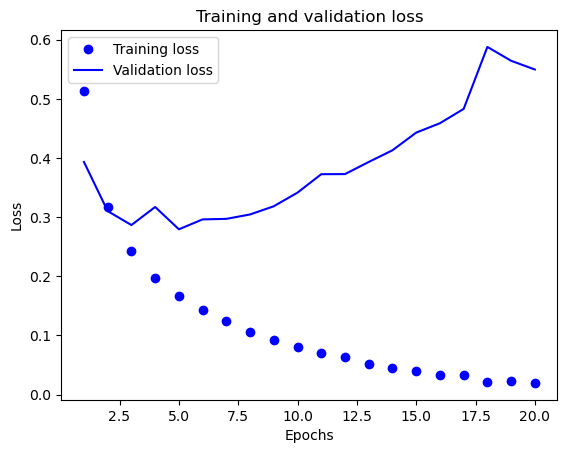

In [22]:
import matplotlib.pyplot as plt
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

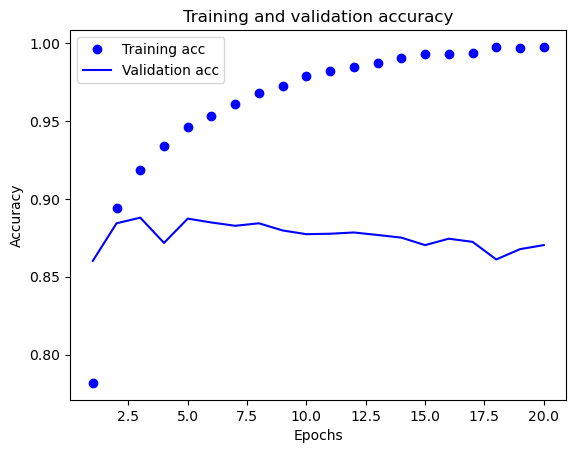

In [23]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [34]:
model = keras.Sequential([
    layers.Dense(16,activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [35]:
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/3
49/49 [==============================] - 2s 19ms/step - loss: 0.4567 - accuracy: 0.8104
Epoch 2/3
49/49 [==============================] - 1s 19ms/step - loss: 0.2648 - accuracy: 0.9050
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2965 - accuracy: 0.8796


In [36]:
results

[0.2964628040790558, 0.8796399831771851]

In [37]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.2946649 ],
       [0.9994972 ],
       [0.955378  ],
       ...,
       [0.19517422],
       [0.15732417],
       [0.61473674]], dtype=float32)

In [ ]:
# We will try:
# 1) Different number of layers
# 2) Different number of neurons in layers (64 instead of 32)
# 3) Other Activation functions

## A multiclass classification example
## Classifying newswires

### The Reuters dataset:

In [38]:
from tensorflow.keras.datasets import reuters 
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words =10000)

2110848/2110848 [==============================] - 1s 0us/step


In [39]:
len(train_data)

8982

In [41]:
len(test_data)

2246

In [42]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

##### Decoding articles back to text

In [43]:
word_index = reuters.get_word_index() # word_index is a dictionary mapping words to an integer index.
# Reverses it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
# Decodes the review. Note that the indices are offset by 3 because 
# 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

550378/550378 [==============================] - 1s 1us/step


In [44]:
decoded_review

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [45]:
train_labels[0]

3

##### Preparing the data:

###### Encoding input data:

In [46]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

###### Encoding labels:

In [51]:
def to_one_hot(labels,dimension=46):
    results = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label]=1.0
    return results

In [52]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [53]:
## Same fumction in keras
from tensorflow.keras.utils import to_categorical
y_train_keras = to_categorical(train_labels)
y_test_keras = to_categorical(test_labels)

##### Building Model:

In [54]:
model = keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(46,activation= "softmax")
])

In [55]:
model.compile(optimizer="rmsprop",
             loss = "categorical_crossentropy",
             metrics=["accuracy"])

In [56]:
x_val = x_train[:1000]
y_val = y_train_keras[:1000]
partial_x_train = x_train[1000:]
partial_y_train = y_train_keras[1000:]

In [57]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val,y_val)
)

Epoch 1/20
16/16 [==============================] - 3s 114ms/step - loss: 2.5749 - accuracy: 0.5024 - val_loss: 1.6613 - val_accuracy: 0.6480
Epoch 2/20
16/16 [==============================] - 1s 93ms/step - loss: 1.3953 - accuracy: 0.7067 - val_loss: 1.2658 - val_accuracy: 0.7280
Epoch 3/20
16/16 [==============================] - 2s 95ms/step - loss: 1.0441 - accuracy: 0.7795 - val_loss: 1.1010 - val_accuracy: 0.7590
Epoch 4/20
16/16 [==============================] - 2s 97ms/step - loss: 0.8213 - accuracy: 0.8252 - val_loss: 0.9915 - val_accuracy: 0.7930
Epoch 5/20
16/16 [==============================] - 1s 89ms/step - loss: 0.6533 - accuracy: 0.8638 - val_loss: 0.9492 - val_accuracy: 0.7910
Epoch 6/20
16/16 [==============================] - 2s 100ms/step - loss: 0.5334 - accuracy: 0.8874 - val_loss: 0.8973 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 2s 101ms/step - loss: 0.4273 - accuracy: 0.9116 - val_loss: 0.8480 - val_accuracy: 0.8170
Epoch 8/20

In [58]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

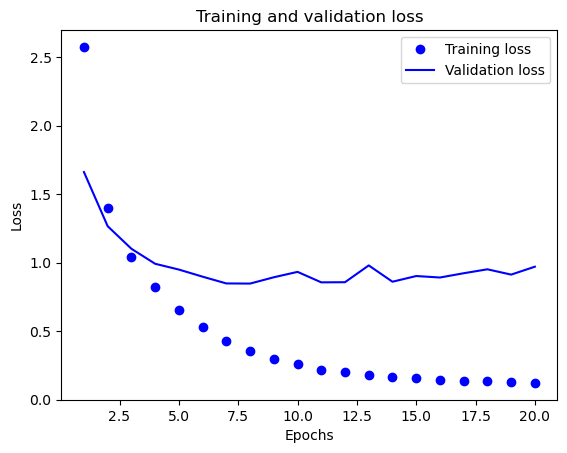

In [59]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

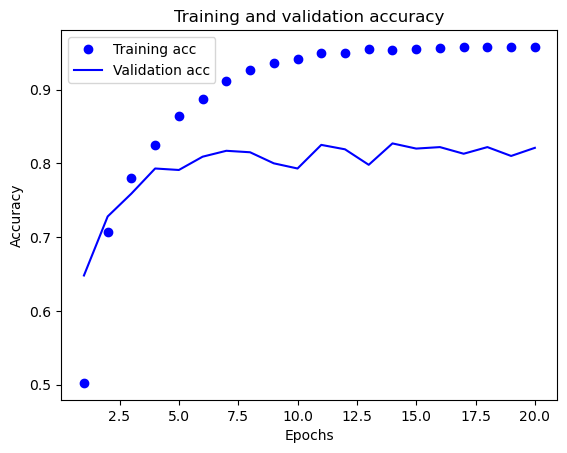

In [60]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [65]:
np.argmin(val_loss_values)

7

In [66]:
np.argmax(val_acc)

13

###### Retrain:

In [67]:
model = keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(46,activation= "softmax")
])

In [68]:
model.compile(optimizer="rmsprop",
             loss = "categorical_crossentropy",
             metrics=["accuracy"])

In [69]:
model.fit(
    x_train,
    y_train,
    epochs=7,
    batch_size=512,
    
)

Epoch 1/7
18/18 [==============================] - 2s 84ms/step - loss: 2.3134 - accuracy: 0.5305
Epoch 2/7
18/18 [==============================] - 2s 96ms/step - loss: 1.2726 - accuracy: 0.7233
Epoch 3/7
18/18 [==============================] - 2s 88ms/step - loss: 0.9676 - accuracy: 0.7927
Epoch 4/7
18/18 [==============================] - 1s 82ms/step - loss: 0.7619 - accuracy: 0.8346
Epoch 5/7
18/18 [==============================] - 1s 82ms/step - loss: 0.5932 - accuracy: 0.8764
Epoch 6/7
18/18 [==============================] - 2s 87ms/step - loss: 0.4815 - accuracy: 0.8957
Epoch 7/7
18/18 [==============================] - 2s 91ms/step - loss: 0.3902 - accuracy: 0.9183


In [71]:
results = model.evaluate(x_test, y_test)


71/71 [==============================] - 1s 6ms/step - loss: 0.9232 - accuracy: 0.7898


In [72]:
results

[0.9232298135757446, 0.7898486256599426]

In [73]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.17809439002671415

In [74]:
predictions = model.predict(x_test)


71/71 [==============================] - 0s 5ms/step


In [75]:
predictions[0].shape

(46,)

In [76]:
np.sum(predictions[0])

0.9999999

In [77]:
np.argmax(predictions[0])

3

In [78]:
test_labels[0]

3

#### A different way to handle the labels and the loss(with categorical outputs):

In [79]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [80]:
model = keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(46,activation= "softmax")
])

In [83]:
model.compile(optimizer="rmsprop",
             loss = "sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [84]:
x_val = x_train[:1000]
y_val = y_train[:1000]
partial_x_train = x_train[1000:]
partial_y_train = y_train[1000:]

In [85]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val,y_val)
)

Epoch 1/20
16/16 [==============================] - 3s 121ms/step - loss: 2.4710 - accuracy: 0.5381 - val_loss: 1.5701 - val_accuracy: 0.6740
Epoch 2/20
16/16 [==============================] - 1s 93ms/step - loss: 1.3255 - accuracy: 0.7207 - val_loss: 1.2302 - val_accuracy: 0.7310
Epoch 3/20
16/16 [==============================] - 1s 91ms/step - loss: 0.9997 - accuracy: 0.7846 - val_loss: 1.0961 - val_accuracy: 0.7600
Epoch 4/20
16/16 [==============================] - 2s 98ms/step - loss: 0.7944 - accuracy: 0.8309 - val_loss: 0.9831 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 2s 115ms/step - loss: 0.6416 - accuracy: 0.8649 - val_loss: 0.9255 - val_accuracy: 0.8060
Epoch 6/20
16/16 [==============================] - 2s 107ms/step - loss: 0.5164 - accuracy: 0.8929 - val_loss: 0.9058 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 2s 104ms/step - loss: 0.4235 - accuracy: 0.9103 - val_loss: 0.8667 - val_accuracy: 0.8250
Epoch 8/2

In [86]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

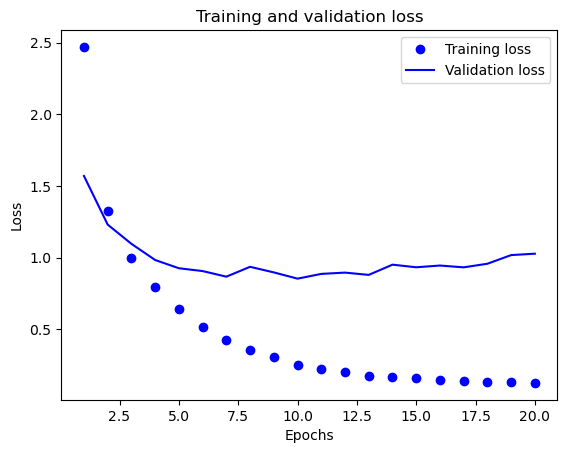

In [87]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

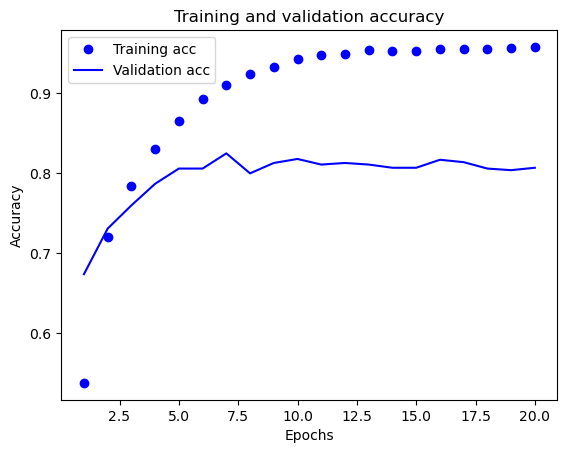

In [88]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [89]:
np.argmin(val_loss_values)

9

In [90]:
np.argmax(val_acc)

6

In [91]:
model = keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(46,activation= "softmax")
])

In [92]:
model.compile(optimizer="rmsprop",
             loss = "sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [93]:
model.fit(
    x_train,
    y_train,
    epochs=9,
    batch_size=512,
    
)

Epoch 1/9
18/18 [==============================] - 3s 86ms/step - loss: 2.2672 - accuracy: 0.5570
Epoch 2/9
18/18 [==============================] - 2s 87ms/step - loss: 1.2145 - accuracy: 0.7405
Epoch 3/9
18/18 [==============================] - 2s 94ms/step - loss: 0.9097 - accuracy: 0.8037
Epoch 4/9
18/18 [==============================] - 2s 91ms/step - loss: 0.7112 - accuracy: 0.8461
Epoch 5/9
18/18 [==============================] - 2s 90ms/step - loss: 0.5545 - accuracy: 0.8870
Epoch 6/9
18/18 [==============================] - 2s 88ms/step - loss: 0.4428 - accuracy: 0.9037
Epoch 7/9
18/18 [==============================] - 2s 89ms/step - loss: 0.3614 - accuracy: 0.9221
Epoch 8/9
18/18 [==============================] - 2s 101ms/step - loss: 0.3051 - accuracy: 0.9332
Epoch 9/9
18/18 [==============================] - 2s 97ms/step - loss: 0.2568 - accuracy: 0.9415


In [94]:
results = model.evaluate(x_test, y_test)


71/71 [==============================] - 1s 5ms/step - loss: 0.9004 - accuracy: 0.8010


In [95]:
results

[0.9003921151161194, 0.800979495048523]

In [96]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 5ms/step


In [98]:
np.argmax(predictions[0])

3

In [99]:
test_labels[0]

3

### The importance of having sufficiently large intermediate layers
#### A model with an information bottleneck

In [101]:
x_val = x_train[:1000]
y_val = y_train_keras[:1000]
partial_x_train = x_train[1000:]
partial_y_train = y_train_keras[1000:]

In [102]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 23ms/step - loss: 3.0629 - accuracy: 0.2216 - val_loss: 2.4999 - val_accuracy: 0.3690
Epoch 2/20
63/63 [==============================] - 1s 19ms/step - loss: 2.2098 - accuracy: 0.3692 - val_loss: 2.0112 - val_accuracy: 0.3780
Epoch 3/20
63/63 [==============================] - 1s 20ms/step - loss: 1.8228 - accuracy: 0.4092 - val_loss: 1.7050 - val_accuracy: 0.5750
Epoch 4/20
63/63 [==============================] - 1s 19ms/step - loss: 1.5641 - accuracy: 0.5892 - val_loss: 1.5466 - val_accuracy: 0.5910
Epoch 5/20
63/63 [==============================] - 1s 21ms/step - loss: 1.4461 - accuracy: 0.5975 - val_loss: 1.5022 - val_accuracy: 0.5970
Epoch 6/20
63/63 [==============================] - 1s 22ms/step - loss: 1.3826 - accuracy: 0.6031 - val_loss: 1.4793 - val_accuracy: 0.5950
Epoch 7/20
63/63 [==============================] - 1s 19ms/step - loss: 1.3360 - accuracy: 0.6052 - val_loss: 1.4780 - val_accuracy: 0.5940
Epoch 8/20
63

## A regression example
## Predicting house prices

In [103]:
from tensorflow.keras.datasets import boston_housing 
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

57026/57026 [==============================] - 0s 3us/step


In [104]:
train_data.shape

(404, 13)

In [105]:
test_data.shape

(102, 13)

In [106]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

##### Preparing the data


###### Normalizing the data:

In [107]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [109]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64,activation="relu"),
        layers.Dense(64,activation="relu"),
        layers.Dense(1)
                     
    ])
    model.compile(optimizer="rmsprop",
                 loss="mse",
                 metrics=["mae"])
    return model

##### Validating your approach using K-fold validation

In [110]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data,
              partial_train_targets,
              epochs=num_epochs, 
              batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [111]:
all_scores

[1.9842361211776733,
 2.4874112606048584,
 2.6914594173431396,
 2.3589372634887695]

In [114]:
np.mean(all_scores)

2.3805110156536102

In [115]:

num_epochs = 500
all_mae_histories = []

for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data,
              partial_train_targets,
              epochs=num_epochs,
              validation_data=(val_data, val_targets),batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [116]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

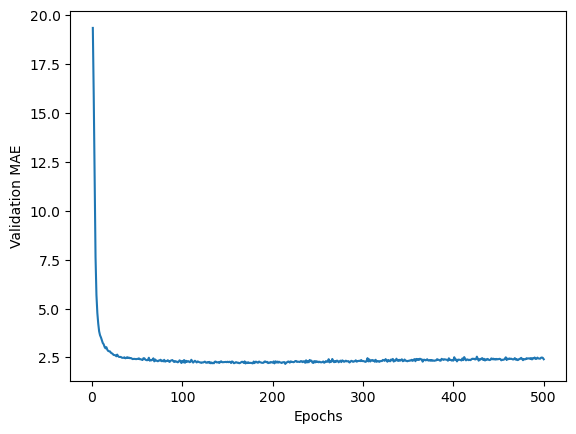

In [117]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

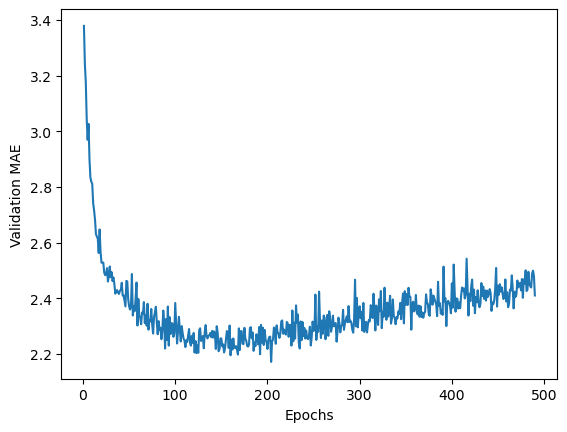

In [118]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()


In [119]:
model = build_model()
model.fit(train_data, train_targets,epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 17.3850 - mae: 2.7026


In [120]:
test_mae_score

2.7026360034942627

In [121]:
predictions = model.predict(test_data)

4/4 [==============================] - 0s 2ms/step


In [122]:
predictions[0]

array([9.467367], dtype=float32)

In [125]:
test_targets[0]

7.2